# Referências

## Cálculo correlação entre variáveis categóricas

* https://en.wikipedia.org/wiki/Contingency_table
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test
* Cressie, N. and Read, T. R. C., “Multinomial Goodness-of-Fit Tests”, J. Royal Stat. Soc. Series B, Vol. 46, No. 3 (1984), pp. 440-464.
* https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
* http://www.ce.memphis.edu/7012/L17_CategoricalVariableAssociation.pdf
* https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
* https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
* https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/
* https://stats.stackexchange.com/questions/260466/how-to-generate-correlated-nominal-variables
* https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
*

# Requerimentos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random

from scipy.stats import chi2_contingency

from dython.nominal import associations

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

# Funções

## Função cria cluster

In [2]:
def create_clusters_df(n,
                       page1, page2, page3, page4,
                       pec1, pec2, pec3, pec4, pec5,
                       pte1, pte2, pte3, pte4, pte5,
                       psex1, psex2, psex3, psex4,
                       prob_turno1, prob_turno2, prob_turno3,
                       prob_integral, prob_meio_per,
                       ped1,ped2,ped3,ped4,ped5,ped6,ped7,ped8,ped9,
                       raca1,raca2,raca3,raca4,raca5,raca6,raca7,
                       sex1,sex2,sex3,sex4,sex5,sex6,sex7,
                       cargo1,cargo2,cargo3,cargo4,cargo5,cargo6,cargo7, cargo8, cargo9,cargo10,
                       cargo11,cargo12,cargo13,cargo14,cargo15,cargo16,cargo17, cargo18, cargo19,
                       cargo20,cargo21,cargo22,cargo23,cargo24,cargo25
                      ):
    
    ####################################### Random selection for given possibilities #####################################

    #
    idade = [1, 2, 3, 4]
    prob_idade = [page1, page2, page3, page4]
    
    #
    sex = [1, 2, 3, 4]
    prob_sex = [psex1, psex2, psex3, psex4]

    #
    estado_civil = [1,2,3,4,5]
    prob_estado_civil = [pec1, pec2, pec3, pec4, pec5]
    
    #
    tempo_empresa = [1,2,3,4,5]
    prob_tempo_empresa = [pte1, pte2, pte3, pte4, pte5]
    
    #
    turno = [1,2,3]
    prob_turno = [prob_turno1, prob_turno2, prob_turno3]
    
    #
    periodo = [1,2]
    prob_periodo = [prob_integral, prob_meio_per]
    
    #
    educacao = [1,2,3,4,5,6,7,8,9]
    prob_educacao = [ped1,ped2,ped3,ped4,ped5,ped6,ped7,ped8,ped9]
    
    #
    raca = [1,2,3,4,5,6,7]
    prob_raca = [raca1,raca2,raca3,raca4,raca5,raca6,raca7]
    
    #
    orientacao_sexual = [1,2,3,4,5,6,7]
    prob_orientacao_sexual = [sex1,sex2,sex3,sex4,sex5,sex6,sex7]
    
    #
    cargos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
    prob_cargos = [cargo1,cargo2,cargo3,cargo4,cargo5,cargo6,cargo7, cargo8, cargo9,cargo10,
                   cargo11,cargo12,cargo13,cargo14,cargo15,cargo16,cargo17, cargo18, cargo19,
                   cargo20,cargo21,cargo22,cargo23,cargo24,cargo25
                  ]

    ##############################################################################################
    
    #
    array_idade = random.choices(population = idade, 
                               weights = prob_idade, 
                               k = n
                               )
    
    
    #
    array_sex = random.choices(population = sex, 
                               weights = prob_sex, 
                               k = n
                               )
    
    # creates array for estado_civil
    array_estado_civil = random.choices(population = estado_civil, 
                                   weights = prob_estado_civil, 
                                   k = n
                                  )
    
    # creates array for company time
    array_tempo_empresa = random.choices(population = tempo_empresa, 
                                   weights = prob_tempo_empresa, 
                                   k = n
                                  )
    
    # creates array for turno
    array_turno = random.choices(population = turno, 
                                   weights = prob_turno, 
                                   k = n
                                  )
    
    # creates array for turno
    array_periodo = random.choices(population = periodo, 
                                   weights = prob_periodo, 
                                   k = n
                                  )
    
    # creates array for nivel_educacao
    array_educacao = random.choices(population = educacao, 
                                   weights = prob_educacao, 
                                   k = n
                                  )
    
    # creates array for nivel_educacao
    array_raca = random.choices(population = raca, 
                                   weights = prob_raca, 
                                   k = n
                                  )
    
    # creates array for nivel_educacao
    array_sexual = random.choices(population = orientacao_sexual, 
                                   weights = prob_orientacao_sexual, 
                                   k = n
                                  )
    
    # creates array for cargos
    array_cargos = random.choices(population = cargos, 
                                   weights = prob_cargos, 
                                   k = n
                                  )

    #################################################### Creates the dataframe ############################################
    # creates arrays for each variable and sets into a list 
    data = list(zip(array_idade, 
                    array_sex,
                    array_estado_civil, 
                    array_tempo_empresa,
                    array_turno,
                    array_periodo,
                    array_educacao,
                    array_raca,
                    array_sexual,
                    array_cargos
                   ))

    # create the heading for the dataframe df01
    columns = ['idade',
               'sexo',
               'estado_civil',
               'tempo_empresa',
               'turno',
               'periodo',
               'educacao',
               'raca',
               'orientacao_sexual',
               'cargo_funcao'
              ]

    #
    df = pd.DataFrame(data, columns = columns) 

    #
    df.reset_index(drop=True)
    
    #
    lista_colunas = df.columns
    
    #
    lista_colunas_desc_dp = []

    #
    for elem in lista_colunas:
        
        df = pd.merge(df,
                      dp_demog[dp_demog['caracteristica'] == elem][['codigo','descricao']],
                      how = 'left',
                      left_on = elem,
                      right_on = 'codigo'
                     ).drop(columns = ['codigo']).rename(columns = {'descricao':str('desc_'+str(elem))})
        
        #
        lista_colunas_desc_dp_aux = str('desc_' + str(elem))
        
        #
        lista_colunas_desc_dp.append(lista_colunas_desc_dp_aux)

    return df,lista_colunas_desc_dp

## Simula preenchimento do questionário

In [3]:
def preenche_questionario(df, df_prob):
    
    #
    n = len(df)
    
    #
    array_prob = np.array(df_prob.drop(columns = 'questao'))
    
    #
    array_choice = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',]
    
    #
    lista_questoes = df_prob['questao'].unique()
    
    #
    m = len(lista_questoes)
    
    #
    new_frame = pd.DataFrame()
    
    for k in range(m):        
        
        for i in range(len(array_prob)): 
            
            frame = pd.DataFrame()

            #
            frame[lista_questoes[m - k - 1]] = random.choices(population = array_choice, 
                                                        weights = array_prob[m - k - 1], 
                                                        k = n
                                                        )
            
           

        #
        new_frame = frame.join(new_frame)    
     
    #
    df = df.join(new_frame)
    
    #
    df['id'] = abs(df.apply(lambda x: hash(tuple(x)), axis = 1))
    col = df.pop('id')
    df.insert(0, col.name, col)
    
    return df, lista_questoes

## Função que constrói tabela de análise demográficas

In [4]:
def tabela_demografica():

    #
    lista_demog = ['idade','sexo','estado_civil','tempo_empresa',
                   'turno','periodo','educacao','raca','orientacao_sexual','cargo_funcao']

    #
    df_demog = pd.DataFrame()

    #
    for elem in lista_demog:

        #
        globals()[f'tb_{elem}'] = pd.DataFrame()

        #
        globals()[f'tb_{elem}'] = df.groupby([elem]).agg(contagem = (elem,'count')).reset_index()

        globals()[f'tb_{elem}'] = globals()[f'tb_{elem}'].rename(columns = {elem:'codigo'})

        #
        globals()[f'tb_{elem}']['caracteristica'] = elem

        #
        globals()[f'tb_{elem}'] = globals()[f'tb_{elem}'][['caracteristica','codigo','contagem']]

        #
        df_demog = pd.concat([df_demog,globals()[f'tb_{elem}']])

    #
    df_demog = pd.merge(df_demog,
                        dp_demog,
                        how = 'left',
                        left_on = ['caracteristica','codigo'],
                        right_on = ['caracteristica','codigo']
                       )

    #
    df_demog['subtotal'] = df_demog.groupby(['caracteristica'])['contagem'].transform('sum')

    #
    df_demog['percentual'] = df_demog['contagem']/df_demog['subtotal']


    df_demog = df_demog[['caracteristica','descricao','contagem','percentual']]

    #
    return df_demog

## Função que constrói dataframe de correlações

* https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/

In [5]:
def funcao_constroi_tb_corr(df, lista_questoes,k):

    # lista_cols_aux = lista_questoes

    lista_cols_aux = lista_questoes[:k]

    aux = df[lista_cols_aux].copy()

    tb_corr = associations(aux, 
                 nominal_columns='auto', 
                 numerical_columns=None, 
                 mark_columns=False, 
                 nom_nom_assoc='cramer', 
                 num_num_assoc='pearson', 
                 #bias_correction=True, 
                 #nan_strategy=_REPLACE, 
                 #nan_replace_value=_DEFAULT_REPLACE_VALUE, 
                 ax=None, 
                 figsize=(12,12), 
                 annot=True, 
                 fmt='.2f', 
                 cmap=None, 
                 sv_color='silver', 
                 cbar=True, 
                 vmax=1.0, 
                 vmin=None, 
                 plot=True, 
                 compute_only=False, 
                 clustering=False, 
                 title=None, 
                 filename=None
                )

    #
    tb_corr = pd.DataFrame(tb_corr['corr']).reset_index()
    
    #
    tb_corr = pd.merge(tb_corr,
                       dp_domain,
                       how = 'left',
                       left_on = 'index',
                       right_on = 'questao'
                      )

    #
    tb_corr = tb_corr.drop(columns = ['questao','questao_pergunta']).rename(columns = {'index':'questao'})

    #
    lista_cols = lista_cols_aux
    lista_add_cols = ['domain','subdomain','subdomain_construct','questao']
    lista_add_cols.extend(lista_cols)

    #
    tb_corr = tb_corr[lista_add_cols]

    #
    return tb_corr, lista_cols_aux

## Função constrói df melt com respostas por usuários

In [6]:
def constroi_df_melt(df, dp_domain,dp_demog):

    lista_demog = dp_demog.caracteristica.unique()
    
    lista_questoes = dp_domain.questao.unique()

    lista_cols_demog_desc = []

    for elem in lista_demog:

        elemento = str('desc_' + str(elem))

        lista_cols_demog_desc.append(elemento)

    lista_cols_demog_desc.append('id')

    #
    df_melt = pd.melt(df, id_vars = lista_cols_demog_desc, value_vars = lista_questoes)

    #
    df_melt = pd.merge(df_melt,
                      dp_domain,
                      how = 'left',
                      left_on = 'variable',
                      right_on = 'questao'
                     )
    

    #
    return df_melt, lista_cols_demog_desc

## Função corrige cluster feliz

In [7]:
def corrige_cluster_feliz(df):

    #
    df.loc[(df['q1'] == 'a') & (df['q2'] == 'd'), 'q2'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q3'] == 'd'), 'q3'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q4'] == 'd'), 'q4'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q5'] == 'd'), 'q5'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q6'] == 'd'), 'q6'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q7'] == 'd'), 'q7'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q8'] == 'd'), 'q8'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q9'] == 'd'), 'q9'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q10'] == 'd'), 'q10'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q11'] == 'd'), 'q11'] = 'a'

    #
    df.loc[(df['q1'] == 'a') & (df['q12a'] == 'f'), 'q12a'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12a'] == 'g'), 'q12a'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12b'] == 'f'), 'q12b'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12b'] == 'g'), 'q12b'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12c'] == 'f'), 'q12c'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12c'] == 'g'), 'q12c'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12d'] == 'f'), 'q12d'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12d'] == 'g'), 'q12d'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12e'] == 'a'), 'q12e'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12f'] == 'a'), 'q12f'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12g'] == 'a'), 'q12g'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q12h'] == 'a'), 'q12h'] = 'a'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q13'] == 'a'), 'q13'] = 'e'
    df.loc[(df['q1'] == 'a') & (df['q14'] == 'e'), 'q14'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q14'] == 'f'), 'q14'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q14'] == 'g'), 'q14'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q15'] == 'e'), 'q15'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q15'] == 'f'), 'q15'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q15'] == 'g'), 'q15'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q16'] == 'e'), 'q16'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q16'] == 'f'), 'q16'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q16'] == 'g'), 'q16'] = 'a'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q17'] == 'd'), 'q17'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q18'] == 'd'), 'q18'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q19'] == 'd'), 'q19'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q20'] == 'd'), 'q20'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q21'] == 'd'), 'q21'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q22'] == 'd'), 'q22'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q23'] == 'd'), 'q23'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q24'] == 'd'), 'q24'] = 'a'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q27'] == 'a'), 'q27'] = 'g'
    df.loc[(df['q1'] == 'a') & (df['q28'] == 'a'), 'q28'] = 'g'
    df.loc[(df['q1'] == 'a') & (df['q29'] == 'd'), 'q29'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q30'] == 'd'), 'q30'] = 'a'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q33a'] == 'd'), 'q33a'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q33b'] == 'd'), 'q33b'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q33c'] == 'd'), 'q33c'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q33d'] == 'd'), 'q33d'] = 'a'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q41'] == 'e'), 'q41'] = 'a'
    df.loc[(df['q1'] == 'a') & (df['q42'] == 'a'), 'q42'] = 'e'
    df.loc[(df['q1'] == 'a') & (df['q44'] == 'a'), 'q44'] = 'c'
    df.loc[(df['q1'] == 'a') & (df['q45'] == 'a'), 'q41'] = 'd'
    df.loc[(df['q1'] == 'a') & (df['q46a'] == 'a'), 'q46a'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q46b'] == 'a'), 'q46b'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q46c'] == 'a'), 'q46c'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q46d'] == 'a'), 'q46d'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q47'] == 'a'), 'q47'] = 'c'
    df.loc[(df['q1'] == 'a') & (df['q48'] == 'a'), 'q48'] = 'c'
    df.loc[(df['q1'] == 'a') & (df['q49'] == 'a'), 'q47'] = 'c'
    df.loc[(df['q1'] == 'a') & (df['q50'] == 'a'), 'q47'] = 'c'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q61a'] == 'a'), 'q61a'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q61b'] == 'a'), 'q61b'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q61c'] == 'a'), 'q61c'] = 'f'
    df.loc[(df['q1'] == 'a') & (df['q61d'] == 'a'), 'q61d'] = 'f'
    
    #
    df.loc[(df['q1'] == 'a') & (df['q64'] == 'd'), 'q64'] = 'b'
    df.loc[(df['q1'] == 'a') & (df['q65'] == 'a'), 'q65'] = 'd'
    df.loc[(df['q1'] == 'a') & (df['q66'] == 'a'), 'q66'] = 'd'
    
    return df

## Função corrige outliers (e.g branco que acha que sofre racismo)

In [8]:
def corrige_outliers(df):
    
    # adulto que sente preconceito por idade
    df.loc[(df['idade'] == 3) & (df['q34'] == 'd'), 'q34'] = 'a'

    # branco que acha que sofre racismo
    df.loc[(df['raca'] == 1) & (df['q35'] == 'd'), 'q35'] = 'a'
    
    # homem hétero que sente discriminação de gênero
    df.loc[(df['sexo'] == 2) 
           & (df['orientacao_sexual'] == 2)
           & (df['q36'] == 'd'), 'q36'
          ] = 'a'
    
    # homem hétero que foi assediado sexualmente
    df.loc[(df['sexo'] == 2) 
           & (df['orientacao_sexual'] == 2)
           & (df['q37'] == 'a'), 'q37'
          ] = 'b'
    
    # pessoa que não bebe e bebeu frequentemente demais 
    df.loc[(df['q54'] == 'a') & (df['q55'] == 'd'), 'q55'] = 'a'
    
    # pessoa sedentária que se exercita frequentemente
    df.loc[(df['q51'] == 'a') & (df['q52'] == 'e'), 'q52'] = 'b'
    df.loc[(df['q51'] == 'a') & (df['q52'] == 'f'), 'q52'] = 'b'
    df.loc[(df['q51'] == 'a') & (df['q52'] == 'g'), 'q52'] = 'b'
    df.loc[(df['q51'] == 'a') & (df['q52'] == 'h'), 'q52'] = 'b'
    
    return df

# Get data

In [9]:
#
df_prob_quest = pd.read_excel('probabilidades_deparas.xlsx', sheet_name = 'prob_questoes')

#
df_prob_dp = pd.read_excel('probabilidades_deparas.xlsx', sheet_name = 'prob_dp')

#
dp_domain = pd.read_excel('probabilidades_deparas.xlsx', sheet_name = 'dp_domain')

#
dp_demog = pd.read_excel('probabilidades_deparas.xlsx', sheet_name = 'dp_demog')

# Cria o dataframe de análise

## Cluster 01

In [10]:
#
lista_prob = list(df_prob_dp.prob)

#
df01,lista_colunas_desc_dp = create_clusters_df(2300, *lista_prob)

#
df01, lista_questoes = preenche_questionario(df01, df_prob_quest)

#
df01 = corrige_cluster_feliz(df01)

#
df01 = corrige_outliers(df01)

## Cluster 02

In [11]:
#
df02,lista_colunas_desc_dp = create_clusters_df(230, *lista_prob)

#
df02, lista_questoes = preenche_questionario(df02, df_prob_quest)

## Une os clusters em dataframe único

In [12]:
#
df = pd.concat([df01,df02])

#
df_melt, lista_cols_demog_desc = constroi_df_melt(df, dp_domain,dp_demog)

#
df_melt = df_melt.fillna('nd')

#
plandin_demog = df.groupby(['desc_idade',
            'desc_estado_civil',
            'desc_tempo_empresa',
            'desc_sexo',
            'desc_turno',
            'desc_periodo',
            'desc_educacao',
            'desc_raca',
            'desc_orientacao_sexual',
            #'desc_cargo_funcao'
           ]).agg(contador = ('id','count')).reset_index()

# Análises

## Análise demográfica

In [13]:
df_demog = tabela_demografica()

df_demog

,caracteristica,descricao,contagem,percentual
0,idade,18 a 29 anos,902,0.356522
1,idade,30 a 44 anos,1046,0.413439
2,idade,45 a 64 anos,462,0.182609
3,idade,65 ou mais,120,0.047431
4,sexo,feminino,768,0.303557
5,sexo,masculino,1692,0.668775
6,sexo,recusado,40,0.015810
7,sexo,não sei,30,0.011858
8,estado_civil,casado ou vivendo com companheiro,1425,0.563241
9,estado_civil,viúvo,98,0.038735


## Tabela de correlações dos subdomínios de construção

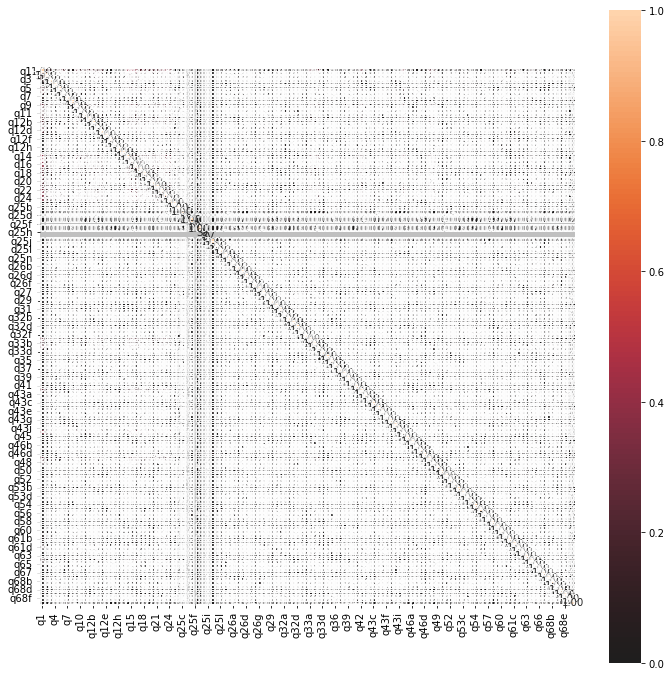

In [14]:
tb_corr, lista_cols_aux = funcao_constroi_tb_corr(df, lista_questoes,len(lista_questoes))

<AxesSubplot:>

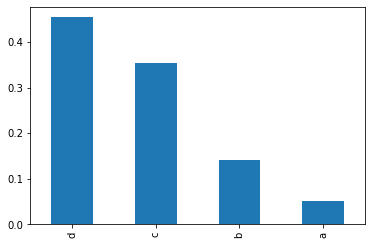

In [15]:
df.q1.value_counts(normalize = True).plot(kind = 'bar')

# Artefatos

## Tabela de probabilidade das respostas

In [16]:
df_prob_quest.head(3)

,questao,a,b,c,d,e,f,g,h
0,q1,0.05,0.15,0.35,0.45,0.00,0.0,0.0,0.0
1,q2,0.05,0.20,0.45,0.30,0.00,0.0,0.0,0.0
2,q3,0.05,0.24,0.30,0.40,0.01,0.0,0.0,0.0


# Probabilidades de respostas

In [17]:
df_prob_dp.head(3)

,codigo,descricao,tipo,prob,nome_prob
0,1,18 a 29 anos,faixa de idade,0.35,page1
1,2,30 a 44 anos,faixa de idade,0.42,page2
2,3,45 a 64 anos,faixa de idade,0.18,page3


## Depara de domínios/subdomínios/constructos

In [18]:
dp_domain.head(3)

,questao,questao_pergunta,domain,subdomain,subdomain_construct
0,q1,"No geral, estou ____ com meu trabalho",Work evaluation & experience,satisfaction,job satisfaction
1,q2,Estou ____ com meu salário,Work evaluation & experience,satisfaction,wage satisfaction
2,q3,Estou ____ com os benefícios fornecidos pelo m...,Work evaluation & experience,satisfaction,benefits satisfaction


## Depara demográfico

In [19]:
dp_demog.head(3)

,caracteristica,codigo,descricao
0,idade,1,18 a 29 anos
1,idade,2,30 a 44 anos
2,idade,3,45 a 64 anos


## Dataset dos respondentes e demográfico

In [20]:
df.head(3)

,id,idade,sexo,estado_civil,tempo_empresa,turno,periodo,educacao,raca,orientacao_sexual,cargo_funcao,desc_idade,desc_sexo,desc_estado_civil,desc_tempo_empresa,desc_turno,desc_periodo,desc_educacao,desc_raca,desc_orientacao_sexual,desc_cargo_funcao,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12a,q12b,q12c,q12d,q12e,q12f,q12g,q12h,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25a,q25b,q25c,q25d,q25e,q25f,q25g,q25h,q25i,q25j,q25k,q25l,q25m,q25n,q26a,q26b,q26c,q26d,q26e,q26f,q26g,q27,q28,q29,q30,q31,q32a,q32b,q32c,q32d,q32e,q32f,q33a,q33b,q33c,q33d,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43a,q43b,q43c,q43d,q43e,q43f,q43g,q43h,q43i,q44,q45,q46a,q46b,q46c,q46d,q47,q48,q49,q50,q51,q52,q53a,q53b,q53c,q53d,q53e,q54,q55,q56,q57,q58,q59,q60,q61a,q61b,q61c,q61d,q62,q63,q64,q65,q66,q67,q68a,q68b,q68c,q68d,q68e,q68f,q68g
0,8928120868870950556,3,4,1,2,1,1,6,3,2,21,45 a 64 anos,não sei,casado ou vivendo com companheiro,1 a 5 anos,manhã,integral,graduação,parda,héterossexual (i.e não gay/lésbica),Produção,d,d,d,d,c,c,a,b,c,c,c,c,g,e,b,c,a,b,g,g,g,g,f,d,d,c,c,b,d,d,d,b,a,b,a,a,a,a,a,a,a,b,a,b,b,b,a,a,b,b,b,b,g,c,a,a,c,d,c,b,d,c,d,c,c,d,a,a,a,a,b,b,b,b,c,b,c,a,a,a,a,c,c,a,a,a,b,c,e,e,g,b,c,a,a,a,d,a,a,a,a,a,b,c,b,b,c,b,e,d,a,d,f,b,c,c,c,c,d,c,e,g,d,c,c,a
1,6204871333298850937,3,2,1,2,3,1,4,1,2,21,45 a 64 anos,masculino,casado ou vivendo com companheiro,1 a 5 anos,noite,integral,ensino médio,branco,héterossexual (i.e não gay/lésbica),Produção,d,b,c,a,b,d,c,b,d,d,d,e,e,e,e,c,e,c,d,d,e,g,d,d,d,d,c,b,c,d,d,a,b,a,a,a,a,c,a,a,a,a,b,b,b,b,b,a,b,b,b,a,f,c,b,e,d,d,a,c,c,d,d,c,c,c,c,a,c,a,b,b,b,b,d,a,a,a,a,a,a,a,a,a,c,a,b,b,f,e,d,d,c,b,b,a,a,a,a,a,a,a,b,a,b,d,a,b,b,d,e,c,e,b,c,d,c,a,d,a,a,g,c,b,e,b
2,2402220441527632148,1,1,1,2,1,1,6,3,2,21,18 a 29 anos,feminino,casado ou vivendo com companheiro,1 a 5 anos,manhã,integral,graduação,parda,héterossexual (i.e não gay/lésbica),Produção,b,c,d,a,c,d,d,b,a,d,d,e,a,g,d,d,d,e,c,g,e,c,f,c,d,b,c,c,d,c,d,a,a,b,a,a,a,b,a,a,a,b,b,a,b,b,b,a,b,b,b,b,c,g,a,a,d,c,c,b,d,c,d,c,c,c,a,a,b,c,b,b,a,b,a,a,a,a,a,a,a,a,a,a,a,a,c,f,f,f,c,a,b,a,a,a,a,a,a,a,a,a,a,a,c,b,b,a,e,e,b,c,a,b,c,c,d,c,b,d,e,a,f,c,c,c


## Lista das probabilidades dos dados demográficos

In [21]:
lista_prob

[0.35,
 0.42,
 0.18,
 0.05,
 0.55,
 0.03,
 0.1,
 0.02,
 0.3,
 0.15,
 0.55,
 0.22,
 0.06,
 0.02,
 0.32,
 0.65,
 0.02,
 0.01,
 0.7,
 0.25,
 0.05,
 0.95,
 0.05,
 0.0,
 0.0,
 0.1,
 0.3,
 0.1,
 0.35,
 0.1,
 0.04,
 0.01,
 0.4,
 0.1,
 0.45,
 0.02,
 0.01,
 0.01,
 0.01,
 0.08,
 0.85,
 0.04,
 0.01,
 0.005,
 0.01,
 0.005,
 6.0,
 0.0,
 1.0,
 2.5,
 3.0,
 0.5,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 4.0,
 1.0,
 0.0,
 3.0,
 1.0,
 0.0,
 13.0,
 0.0,
 57.0,
 1.0,
 2.0,
 2.0,
 0.0]

## Lista das colunas do depara de descrições

In [22]:
lista_colunas_desc_dp

['desc_idade',
 'desc_sexo',
 'desc_estado_civil',
 'desc_tempo_empresa',
 'desc_turno',
 'desc_periodo',
 'desc_educacao',
 'desc_raca',
 'desc_orientacao_sexual',
 'desc_cargo_funcao']

## Lista com o nome/numeração das questões

In [23]:
lista_questoes

array(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12a', 'q12b', 'q12c', 'q12d', 'q12e', 'q12f', 'q12g', 'q12h',
       'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25a', 'q25b', 'q25c', 'q25d', 'q25e',
       'q25f', 'q25g', 'q25h', 'q25i', 'q25j', 'q25k', 'q25l', 'q25m',
       'q25n', 'q26a', 'q26b', 'q26c', 'q26d', 'q26e', 'q26f', 'q26g',
       'q27', 'q28', 'q29', 'q30', 'q31', 'q32a', 'q32b', 'q32c', 'q32d',
       'q32e', 'q32f', 'q33a', 'q33b', 'q33c', 'q33d', 'q34', 'q35',
       'q36', 'q37', 'q38', 'q39', 'q40', 'q41', 'q42', 'q43a', 'q43b',
       'q43c', 'q43d', 'q43e', 'q43f', 'q43g', 'q43h', 'q43i', 'q44',
       'q45', 'q46a', 'q46b', 'q46c', 'q46d', 'q47', 'q48', 'q49', 'q50',
       'q51', 'q52', 'q53a', 'q53b', 'q53c', 'q53d', 'q53e', 'q54', 'q55',
       'q56', 'q57', 'q58', 'q59', 'q60', 'q61a', 'q61b', 'q61c', 'q61d',
       'q62', 'q63', 'q64', 'q65', 'q66', 'q67', 'q68a', 'q68b', '

## Lista das colunas com variáveis demográficas incluindo Id

In [24]:
lista_cols_demog_desc

['desc_idade',
 'desc_estado_civil',
 'desc_tempo_empresa',
 'desc_sexo',
 'desc_turno',
 'desc_periodo',
 'desc_educacao',
 'desc_raca',
 'desc_orientacao_sexual',
 'desc_cargo_funcao',
 'id']

## Lista das colunas geradas na tabela de correlação 

O usuário pode selecionar quantas colunas das questões quer utilizar para o cálculo da matriz de correlações

In [25]:
lista_cols_aux

array(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12a', 'q12b', 'q12c', 'q12d', 'q12e', 'q12f', 'q12g', 'q12h',
       'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25a', 'q25b', 'q25c', 'q25d', 'q25e',
       'q25f', 'q25g', 'q25h', 'q25i', 'q25j', 'q25k', 'q25l', 'q25m',
       'q25n', 'q26a', 'q26b', 'q26c', 'q26d', 'q26e', 'q26f', 'q26g',
       'q27', 'q28', 'q29', 'q30', 'q31', 'q32a', 'q32b', 'q32c', 'q32d',
       'q32e', 'q32f', 'q33a', 'q33b', 'q33c', 'q33d', 'q34', 'q35',
       'q36', 'q37', 'q38', 'q39', 'q40', 'q41', 'q42', 'q43a', 'q43b',
       'q43c', 'q43d', 'q43e', 'q43f', 'q43g', 'q43h', 'q43i', 'q44',
       'q45', 'q46a', 'q46b', 'q46c', 'q46d', 'q47', 'q48', 'q49', 'q50',
       'q51', 'q52', 'q53a', 'q53b', 'q53c', 'q53d', 'q53e', 'q54', 'q55',
       'q56', 'q57', 'q58', 'q59', 'q60', 'q61a', 'q61b', 'q61c', 'q61d',
       'q62', 'q63', 'q64', 'q65', 'q66', 'q67', 'q68a', 'q68b', '

## Dataframe vertical (melt) na variável Questão

In [26]:
df_melt.head(3)

,desc_idade,desc_estado_civil,desc_tempo_empresa,desc_sexo,desc_turno,desc_periodo,desc_educacao,desc_raca,desc_orientacao_sexual,desc_cargo_funcao,id,variable,value,questao,questao_pergunta,domain,subdomain,subdomain_construct
0,45 a 64 anos,casado ou vivendo com companheiro,1 a 5 anos,não sei,manhã,integral,graduação,parda,héterossexual (i.e não gay/lésbica),Produção,8928120868870950556,q1,d,q1,"No geral, estou ____ com meu trabalho",Work evaluation & experience,satisfaction,job satisfaction
1,45 a 64 anos,casado ou vivendo com companheiro,1 a 5 anos,masculino,noite,integral,ensino médio,branco,héterossexual (i.e não gay/lésbica),Produção,6204871333298850937,q1,d,q1,"No geral, estou ____ com meu trabalho",Work evaluation & experience,satisfaction,job satisfaction
2,18 a 29 anos,casado ou vivendo com companheiro,1 a 5 anos,feminino,manhã,integral,graduação,parda,héterossexual (i.e não gay/lésbica),Produção,2402220441527632148,q1,b,q1,"No geral, estou ____ com meu trabalho",Work evaluation & experience,satisfaction,job satisfaction


## Cubo de análise demográfica

In [27]:
plandin_demog.head(3)

,desc_idade,desc_estado_civil,desc_tempo_empresa,desc_sexo,desc_turno,desc_periodo,desc_educacao,desc_raca,desc_orientacao_sexual,contador
0,18 a 29 anos,casado ou vivendo com companheiro,1 a 5 anos,feminino,manhã,integral,ensino fundamental,amarela,héterossexual (i.e não gay/lésbica),1
1,18 a 29 anos,casado ou vivendo com companheiro,1 a 5 anos,feminino,manhã,integral,ensino fundamental,parda,héterossexual (i.e não gay/lésbica),1
2,18 a 29 anos,casado ou vivendo com companheiro,1 a 5 anos,feminino,manhã,integral,ensino médio,branco,héterossexual (i.e não gay/lésbica),8


## Tabela com os dados demográficos apresentada no artigo

In [28]:
df_demog

,caracteristica,descricao,contagem,percentual
0,idade,18 a 29 anos,902,0.356522
1,idade,30 a 44 anos,1046,0.413439
2,idade,45 a 64 anos,462,0.182609
3,idade,65 ou mais,120,0.047431
4,sexo,feminino,768,0.303557
5,sexo,masculino,1692,0.668775
6,sexo,recusado,40,0.015810
7,sexo,não sei,30,0.011858
8,estado_civil,casado ou vivendo com companheiro,1425,0.563241
9,estado_civil,viúvo,98,0.038735


## Tabela de correlações das questões 

Será utilizada na construção da tabela original do artigo com as correlações entre os constructos

In [29]:
tb_corr.head()

,domain,subdomain,subdomain_construct,questao,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12a,q12b,q12c,q12d,q12e,q12f,q12g,q12h,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25a,q25b,q25c,q25d,q25e,q25f,q25g,q25h,q25i,q25j,q25k,q25l,q25m,q25n,q26a,q26b,q26c,q26d,q26e,q26f,q26g,q27,q28,q29,q30,q31,q32a,q32b,q32c,q32d,q32e,q32f,q33a,q33b,q33c,q33d,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43a,q43b,q43c,q43d,q43e,q43f,q43g,q43h,q43i,q44,q45,q46a,q46b,q46c,q46d,q47,q48,q49,q50,q51,q52,q53a,q53b,q53c,q53d,q53e,q54,q55,q56,q57,q58,q59,q60,q61a,q61b,q61c,q61d,q62,q63,q64,q65,q66,q67,q68a,q68b,q68c,q68d,q68e,q68f,q68g
0,Work evaluation & experience,satisfaction,job satisfaction,q1,1.000000,0.148860,0.189918,0.047453,0.178699,0.212253,0.067495,0.052207,0.279726,0.162179,0.164329,0.200677,0.218362,0.170292,0.210273,0.017116,0.000000,0.000000,0.000000,0.042352,0.397709,0.412260,0.374230,0.234824,0.217616,0.208376,0.195916,0.197549,0.282525,0.336836,0.318642,0.007683,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032952,0.037039,0.036597,0.036477,0.035592,0.000000,0.000000,0.0,0.000000,0.026988,0.025576,0.01926,0.018908,0.027718,0.042025,0.00000,0.018331,0.000000,0.000000,0.0,0.000000,0.0,0.263853,0.146180,0.249669,0.02844,0.0,0.000000,0.016025,0.000000,0.030972,0.000000,0.000000,0.067059,0.256389,0.008508,0.000000,0.000000,0.000000,0.021933,0.028123,0.000000,0.000000,0.0,0.324183,0.005302,0.03326,0.019278,0.034332,0.029023,0.229452,0.167353,0.000000,0.000000,0.034290,0.000000,0.028371,0.055289,0.000000,0.00000,0.007548,0.018114,0.000000,0.000000,0.000000,0.000000,0.000000,0.030324,0.067483,0.075911,0.053020,0.134023,0.0,0.000000,0.129841,0.049810,0.031528,0.006660,0.000000,0.000000,0.034472,0.029115,0.027064,0.000000,0.017128
1,Work evaluation & experience,satisfaction,wage satisfaction,q2,0.148860,1.000000,0.058291,0.000000,0.053984,0.082864,0.000000,0.000000,0.072688,0.058652,0.045984,0.039483,0.059028,0.046818,0.062170,0.013920,0.025637,0.018383,0.019894,0.000000,0.112356,0.132639,0.095809,0.085511,0.057196,0.064259,0.057834,0.066043,0.059815,0.098017,0.079287,0.048228,0.010268,0.033842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022675,0.000000,0.021025,0.000000,0.016304,0.000000,0.0,0.013496,0.044410,0.000000,0.00000,0.032621,0.000000,0.034776,0.00000,0.020036,0.006918,0.000000,0.0,0.009070,0.0,0.076705,0.031198,0.060090,0.00000,0.0,0.000000,0.005693,0.030958,0.000000,0.072614,0.000000,0.013572,0.105596,0.019973,0.000000,0.000000,0.020138,0.000000,0.000000,0.000000,0.000000,0.0,0.103000,0.021674,0.00000,0.000000,0.020175,0.023523,0.062688,0.054808,0.000000,0.000000,0.025656,0.042882,0.013332,0.012630,0.043163,0.00000,0.000000,0.000000,0.012239,0.000000,0.003583,0.000000,0.049762,0.022714,0.047234,0.041295,0.000000,0.063090,0.0,0.023738,0.037038,0.040561,0.000000,0.000000,0.000000,0.046464,0.000000,0.030921,0.000000,0.028888,0.000000
2,Work evaluation & experience,satisfaction,benefits satisfaction,q3,0.189918,0.058291,1.000000,0.041037,0.059222,0.070888,0.009816,0.041917,0.103299,0.052970,0.066059,0.039090,0.069644,0.051373,0.087371,0.020600,0.010588,0.000000,0.035324,0.000000,0.128427,0.132059,0.104744,0.095399,0.078843,0.089031,0.060916,0.080434,0.099192,0.128112,0.100453,0.012835,0.028031,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.021939,0.000000,0.000000,0.000000,0.030915,0.030989,0.0,0.040176,0.000000,0.000000,0.00000,0.000000,0.019228,0.000000,0.00000,0.000000,0.000000,0.012014,0.0,0.000000,0.0,0.095164,0.050985,0.076544,0.00000,0.0,0.000000,0.000000,0.019300,0.000000,0.030076,0.014076,0.000000,0.068958,0.002794,0.037746,0.038028,0.000000,0.023344,0.005488,0.000000,0.042093,0.0,0.132276,0.000000,0.00000,0.010983,0.000000,0.028078,0.073205,0.055689,0.020298,0.023476,0.000000,0.000000,0.000000,0.000000,0.000000,0.04561,0.000000,0.000000,0.000000,0.028010,0.000000,0.024578,0.000000,0.039013,0.000000,0.044868,0.000000,0.061627,0.0,0.000000,0.024523,0.000000,0.028981,0.000000,0.036155,0.000000,0.008808,0.000000,0.012497,0.000000,0.000000
3

## Tabela Melt com os dados de correlação (tb_corr)

In [30]:
lista_melt_questoes = ['domain','subdomain','subdomain_construct','questao']

#
df_question_melt = pd.melt(tb_corr, id_vars = lista_melt_questoes, value_vars = lista_cols_aux)

#
df_question_melt = df_question_melt.rename(columns = {'domain':'domain_questao',
                                   'subdomain':'subdomain_questao',
                                   'subdomain_construct':'subdomain_construct_questao',
                                  }
                       )

df_question_melt = pd.merge(df_question_melt, 
                            dp_domain[['questao','domain','subdomain','subdomain_construct']],
                            how = 'left',
                            left_on = 'variable',
                            right_on = 'questao'
                           ).drop(columns = 'questao_y').rename(columns = {'questao_x':'questao'})

#
df_question_melt

,domain_questao,subdomain_questao,subdomain_construct_questao,questao,variable,value,domain,subdomain,subdomain_construct
0,Work evaluation & experience,satisfaction,job satisfaction,q1,q1,1.000000,Work evaluation & experience,satisfaction,job satisfaction
1,Work evaluation & experience,satisfaction,wage satisfaction,q2,q1,0.148860,Work evaluation & experience,satisfaction,job satisfaction
2,Work evaluation & experience,satisfaction,benefits satisfaction,q3,q1,0.189918,Work evaluation & experience,satisfaction,job satisfaction
3,Work evaluation & experience,satisfaction,advancement satisfaction,q4,q1,0.047453,Work evaluation & experience,satisfaction,job satisfaction
4,Work evaluation & experience,satisfaction,supervisor satisfaction,q5,q1,0.178699,Work evaluation & experience,satisfaction,job satisfaction
...,...,...,...,...,...,...,...,...,...
15871,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work,q68c,q68g,0.000000,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work
15872,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work,q68d,q68g,0.020902,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work
15873,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work,q68e,q68g,0.000000,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work
15874,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work,q68f,q68g,0.000000,"Home, community, and society",Acitivities Outside of Work,Acitivities Outside of Work


# Salvando Artefatos

## Tabela de correlação e tabela de dados demográficos iguais do artigo NIOSHI

In [31]:
with pd.ExcelWriter('TabelasAnaliseDadosResultados.xlsx') as writer:
    
    df_question_melt.to_excel(writer, sheet_name = 'TabCorrelData')
    df_demog.to_excel(writer, sheet_name = 'TabDemogData')

## Cubos de Consumo para Análise dos Resultados

In [32]:
#
df_melt.to_excel('cubo_analises_resultados.xlsx')

#
plandin_demog.to_excel('cubo_analise_demografica.xlsx')